## Fit of Neutron Reflectivity data from a polymer Brush

Suppose that we want to fit NR data of a polymer brushe at the Quartz/d-toluene interface. Polymer brushes have parabolic volume fraction profiles of the form: $\phi(z) = \phi(0) \left[ 1 - (\frac{z}{L})^n\right]$ where $\phi$ is the polymer volume fraction, $L$ is the brush extension, $n$ the exponent and $z$ the distance from the substrate.

First let's import _anaklasis_

In [1]:
from anaklasis import anaklasis

We name the project as 'Brush_fit'. All results will be exported in a folder with this name. Then we import the experimental curve and we set input units to Angstrom.

In [2]:
project='Brush_fit'
in_file=['DA34424a.dat']
units=['A'] # Angstrom units

then we set the details of the fit. Note that we will perform MCMC sampling.

In [3]:
fit_mode=0 # linear
fit_weight=[1] 
method = 'mcmc' # Markov Chain Monte Carlo

We have a single laterally uniform layer on the substrate (brush) so a single defined model (patch) of 100% coverage

In [4]:
patches=[1.0]

We define all layers except for the brush. Note that a thin water layer is always present on the substrate in these measurements. A global parameter (that will be defined later) is associated with the thickness of this thin water layer. all other layer parameters are fixed.

In [5]:
system=[]
system.append([
	# Re_sld Im_sld thk rough solv description
	[  4.32e-6, 0.0, 0, 5, 0.0, 'Quartz'],
	[ -0.56e-6, 0.0, 'p3', 3, 0.0, 'water'],
	[  5.86e-6, 0.0,  0, 0, 1.0, 'd-toluene'],
	])

We will now insert between water layer and d-toluene, 20 slices representing the polymer brush. These layers will all have the same polymer sld and a varying solvent volume fraction ($1-\phi(z)$). For this reason we first define a symbolic expression for the solvent volume fraction.

In [6]:
expr='1-p0+(p0/(p1**p2))*((p1/20)*(n-1.5))**p2'

where p0, p1, p2 are global parameters (we will define them later) representing $\phi(0)$, $L$ and the exponent. $n$ is the layer number that for our brush layer runs from 2 to 21. So the expression $(p1/20)*(n-1.5)$ gives the $z$ distance of each slice from the substrate. So now we insert the slices of the brush in the model _list_ using a _for loop_.

In [7]:
for i in range(20): 
	system[0].insert(2,[ 1.41e-6, 0.0,'p1/20', 'p1/40', expr, 'layer'])

Note that we insert in system[0] since counting in python starts from zero. We start insering in position 2 since in position 1 we have the already defined thin water layer. All slices have the same sld, same thickness and we also apply a roughness (half slice thickness) to smooth the profile. The volume fraction profile is set according to the above defined symbolic expression.

Now we may define the global parameters. Note that the global parameters can be of type uniform or normal. For a uniform parameter we assume that the parameter is uniformly distributed in the given min/max bounds. For a normal parameter we assume that the parameter is normally distributed with the defined mean and standard deviation.

In [8]:
global_param = [
    # param  min  max  description  type='uniform'
    # param  mean  sd  description  type='normal'
	['p0', 0.02, 0.20, 'phi0','uniform'],
	['p1', 100, 700, 'brush_length','uniform'],
	['p2', 1, 4, 'exponent','uniform'],
	['p3', 5, 2, 'water thickness','normal'],
	]

We have no multi-parameters or constraints to declare

In [9]:
multi_param = [] # no multi-parameters
constraints = [] # no constraints

we also define the instrumental parameters. Background and scale are set as fixed.

In [10]:
resolution=[0.06] # dQ/Q=6%
background = [[0.0,0.0,'uniform']] #background corrected data
scale = [[1.0,1.0,'uniform']] #data correctly scaled

We finally call the _anaklasis.fit_ function and store the results in the _tuple_ _res_. Note that we set _experror=True_ since our input data contain the $dR(Q)$ errors. 

--------------------------------------------------------------------
Program ANAKLASIS - Fit Module for X-ray/Neutron reflection datasets
version 1.1, February 2021
developed by Dr. Alexandros Koutsioumpas. JCNS @ MLZ
for bugs and requests contact: a.koutsioumpas[at]fz-juelich.de
--------------------------------------------------------------------
Project name: Brush_fit
Using chi squared with errors figure of merit (FOM)
Fast fit mode. Using small differential evolution population size
Parameter uncertainity calculation using Markov Chain Monte Carlo
A plot summarizing results will pop-up after the end of the calculation


Directory already exists.. overwriting data..
file#1 experimental points: 180
Q units in inverse A
dQ/Q =  0.06
fit weight:  1
free parameters =  4


list of free parameters: p0 (phi0),p1 (brush_length),p2 (exponent),p3 (water thickness),

pop_size =  1
Running differential evolution minimization...
/n
Success: True
Number of evaluation: 3633
Number of iterations: 2

100%|██████████| 500/500 [00:30<00:00, 16.23it/s]
N/50 = 10;
tau: [26.338 22.585 23.5   28.12 ]
  0%|          | 2/1680 [00:00<01:48, 15.49it/s]

MCMC production run..


100%|██████████| 1680/1680 [01:43<00:00, 16.28it/s]

Calculating mean curves...
  0%|          | 0/199 [00:00<?, ?it/s]

100%|██████████| 199/199 [02:40<00:00,  1.24it/s]
Plotting curves... please wait...


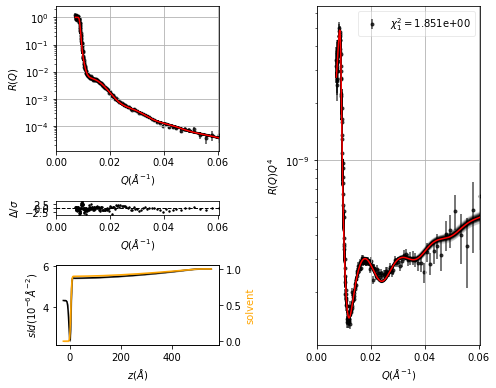

--------------------------------------------------------------------
Final model parameters
--------------------------------------------------------------------


Curve #1


Instrumental Resolution, dQ/Q: 0.06
fit weigth: 1
--------------------------------------------------------------------
Quartz real sld (10^-6 A^-2)      = 4.32 (fixed)
Quartz imaginary sld (10^-6 A^-2) = 0.00 (fixed)
Quartz thickness (A)              = 0.00 (fixed)
Quartz/water roughness (A) = 5.00 (fixed)
Quartz solvent volume fraction    = 0.00 (fixed)
--------------------------------------------------------------------
water real sld (10^-6 A^-2)      = -0.56 (fixed)
water imaginary sld (10^-6 A^-2) = 0.00 (fixed)
water thickness (A)              = 4.16 (parametric), -> p3
water/layer roughness (A) = 3.00 (fixed)
water solvent volume fraction    = 0.00 (fixed)
--------------------------------------------------------------------
layer real sld (10^-6 A^-2)      = 1.41 (fixed)
layer imaginary sld (10^-6 A^-2) = 0.

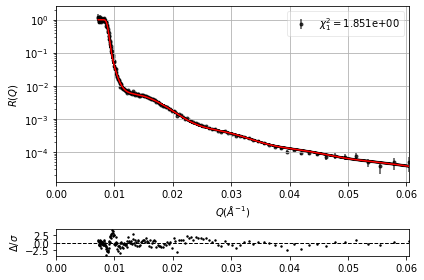

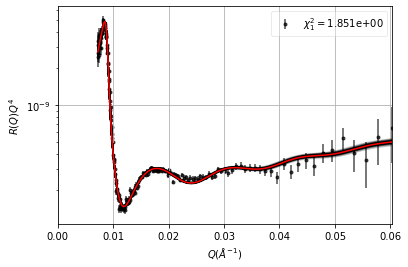

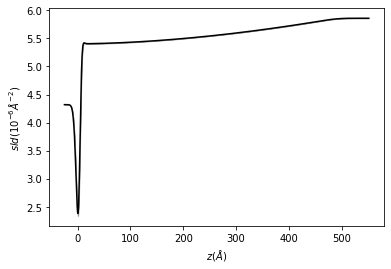

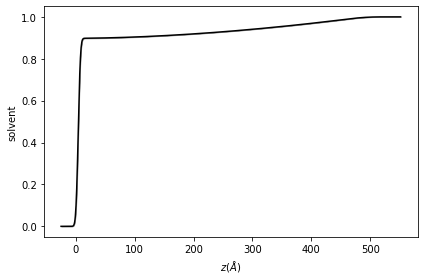

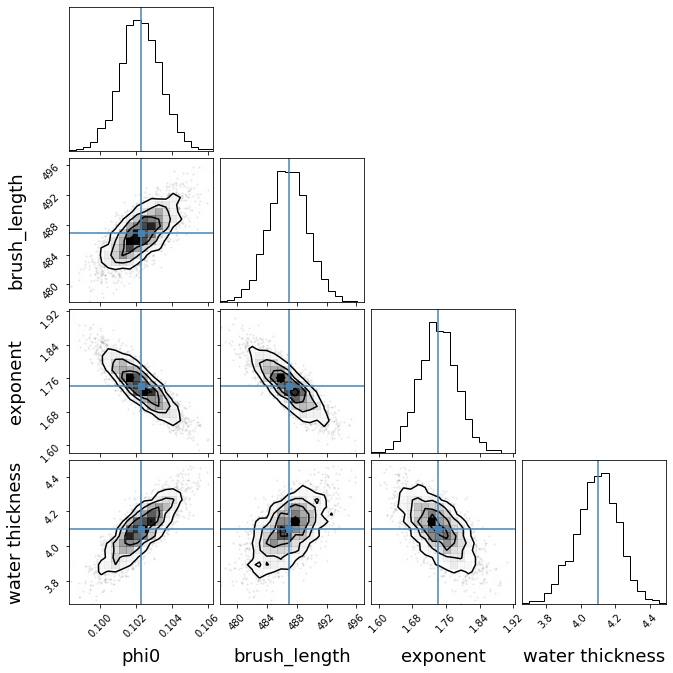

In [11]:
res = anaklasis.fit(project, in_file, units, fit_mode,fit_weight,method,resolution,patches, system,
global_param,multi_param, constraints,background,scale,experror=True, plot=True,fast=True)

_anaklasis_ automatically exports a number of plots for the reflectivity and profiles. A corner plot from the MCMC sampling is exported. If we want to plot manually the volume fraction profile and "zoom" close to the region of the variation of the brush profile we may use the results stored in the res _tuple_. 

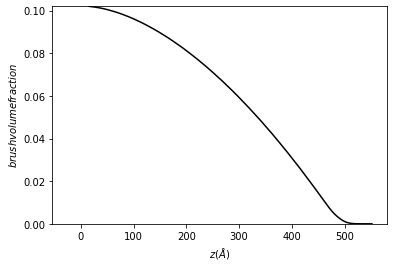

In [12]:
import matplotlib.pyplot as plt
plt.figure()
plt.ylim([0.0,0.102])
plt.plot(res[2][0][0][:,0],1-res[2][0][0][:,1],color='black')
plt.xlabel(r'$z(\AA)$')
plt.ylabel(r'$brush volume fraction$')
plt.draw()

For reference we include a detailed list of the contents of the _res_ _tuple_ in the current example:

	res[0][i][j][Q,R,R*Q^4] <- reflectivity list
	res[1][i][j][z,sld,sd sld] <- sld list
	res[2][i][j][z,solv, sd sld] <- solvent volume fraction list
	res[3][k][mean, sd] <- global_parameter fit list
	res[4][i][l][mean, sd] <- multi_parameter fit list
	res[5][i][mean, sd] <- background fit list
	res[6][i][mean, sd] <- scale fit list
	res[7][i][value] <- chi squared list

	where i the curve number starting from 0 (in the current example only one curve so 0)
	      j the model number starting from 0 (in the current example only one model so 0)
	      k the global_parameter number starting from 0 (in the current ecample from 0 to 3)
	      l the multi_parameter number starting from 0 (no multi_parameter so list is empty [])